In [100]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['Price']=boston.target

In [26]:
boston_df = boston_df.select_dtypes(include=['float64','int64'])

In [27]:
boston_df.shape

(506, 14)

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


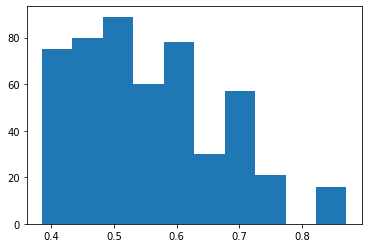

In [54]:
    
# plt.hist(boston_df['NOX'].sort_values())
    
# plt.show()

In [131]:
for col in boston_df:
#     plt.hist(boston_df[col].sort_values())
#     plt.show()
    print(f'Q1,Q3 of {col}:')
    q1 = np.percentile(boston_df[col], 25)
    q3 = np.percentile(boston_df[col], 75)
    iqr = (q3-q1)
    outlier_down = q1-iqr*1.5
    outlier_up = q3+iqr*1.5
    print(f'Q1: {q1}')
    print(f'Q3: {q3}')
    print('----------------------------')
    outliers_down = boston_df[col][boston_df[col]<outlier_down]
    outliers_up = boston_df[col][boston_df[col]>outlier_up]
    print(f'Outlier down: {outliers_down}')
    print(f'Outlier up: {outliers_up}')
    print('====================================')
    

Q1,Q3 of CRIM:
Q1: 0.08204499999999999
Q3: 3.6770825
----------------------------
Outlier down: Series([], Name: CRIM, dtype: float64)
Outlier up: 367    13.5222
371     9.2323
373    11.1081
374    18.4982
375    19.6091
        ...   
468    15.5757
469    13.0751
477    15.0234
478    10.2330
479    14.3337
Name: CRIM, Length: 66, dtype: float64
Q1,Q3 of ZN:
Q1: 0.0
Q3: 12.5
----------------------------
Outlier down: Series([], Name: ZN, dtype: float64)
Outlier up: 39     75.0
40     75.0
54     75.0
55     90.0
56     85.0
       ... 
351    60.0
352    60.0
353    90.0
354    80.0
355    80.0
Name: ZN, Length: 68, dtype: float64
Q1,Q3 of INDUS:
Q1: 5.19
Q3: 18.1
----------------------------
Outlier down: Series([], Name: INDUS, dtype: float64)
Outlier up: Series([], Name: INDUS, dtype: float64)
Q1,Q3 of CHAS:
Q1: 0.0
Q3: 0.0
----------------------------
Outlier down: Series([], Name: CHAS, dtype: float64)
Outlier up: 142    1.0
152    1.0
154    1.0
155    1.0
160    1.0
162    1.

In [127]:
q1 = np.percentile(boston_df['CRIM'], 25)
q3 = np.percentile(boston_df['CRIM'], 75)
iqr = (q3-q1)
outlier_down = q1-iqr*1.5
outlier_up = q3+iqr*1.5
print(f'Q1: {q1}')
print(f'Q3: {q3}')
print('----------------------------')
outliers_down = boston_df['CRIM'][boston_df['CRIM']<outlier_down]
outliers_up = boston_df['CRIM'][boston_df['CRIM']>outlier_up]
print(f'Outlier down: {outliers_down}')
print(f'Outlier up: {outliers_up}')

print('====================================')

Q1: 0.08204499999999999
Q3: 3.6770825
----------------------------
Outlier down: Series([], Name: CRIM, dtype: float64)
Outlier up: 367    13.5222
371     9.2323
373    11.1081
374    18.4982
375    19.6091
        ...   
468    15.5757
469    13.0751
477    15.0234
478    10.2330
479    14.3337
Name: CRIM, Length: 66, dtype: float64


In [128]:
boston_df.drop(outliers_down)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [129]:
print(f'Q1: {q1}')
print(f'Q3: {q3}')
print('----------------------------')
outliers_down = boston_df['CRIM'][boston_df['CRIM']<outlier_down]
outliers_up = boston_df['CRIM'][boston_df['CRIM']>outlier_up]
print(f'Outlier down: {outliers_down}')
print(f'Outlier up: {outliers_up}')
print('====================================')

Q1: 0.08204499999999999
Q3: 3.6770825
----------------------------
Outlier down: Series([], Name: CRIM, dtype: float64)
Outlier up: 367    13.5222
371     9.2323
373    11.1081
374    18.4982
375    19.6091
        ...   
468    15.5757
469    13.0751
477    15.0234
478    10.2330
479    14.3337
Name: CRIM, Length: 66, dtype: float64


In [130]:
boston_df.drop(outliers_up)

KeyError: '[13.5222   9.2323  11.1081  18.4982  19.6091  15.288    9.82349 23.6482\n 17.8667  88.9762  15.8744   9.18702 20.0849  16.8118  24.3938  22.5971\n 14.3337  11.5779  13.3598  38.3518   9.91655 25.0461  14.2362   9.59571\n 24.8017  41.5292  67.9208  20.7162  11.9511  14.4383  51.1358  14.0507\n 18.811   28.6558  45.7461  18.0846  10.8342  25.9406  73.5341  11.8123\n 11.0874  12.0482  15.8603  12.2472  37.6619   9.33889 10.0623  13.9134\n 11.1604  14.4208  15.1772  13.6781   9.39063 22.0511   9.72418  9.96654\n 12.8023  10.6718   9.92485  9.32909  9.51363 15.5757  13.0751  15.0234\n 10.233   14.3337 ] not found in axis'